# ****    Introduction:
Image comparison in data science involves analyzing and comparing images to identify similarities or differences between them. This process can be useful in various applications, including computer vision, pattern recognition, and image processing.

# Predict the color code

In [1]:
import numpy as np 
import pandas as pd 

# NumPy (Numerical Python):

NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

# Pandas:

Pandas is a high-level data manipulation library built on top of NumPy. It provides data structures for efficiently storing large datasets and tools for working with structured data. 

# Import CV2:

The cv2 library, also known as OpenCV (Open Source Computer Vision), is a popular open-source computer vision and machine learning software library. It is designed to provide a comprehensive set of tools for image and video processing tasks. OpenCV is widely used in various domains, including computer vision, robotics, machine learning, and artificial intelligence. When working with computer vision applications in Python, you often import the cv2 library to leverage its functionality.

In [2]:
import cv2
import numpy as np

def predict_image_color(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Calculate the average color
    average_color = np.mean(image, axis=(0, 1))

    # Convert color from BGR to RGB
    average_color = average_color[::-1]

    # Format the color to be more readable
    average_color = tuple(average_color.astype(int))

    return f"Predicted Color: RGB{average_color}"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
print(predict_image_color(image_path))

Predicted Color: RGB(55, 78, 112)


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install webcolors

Note: you may need to restart the kernel to use updated packages.


# Webcolors
The webcolors library in Python provides an easy way to work with HTML/CSS color names and convert them to various color representations. It allows you to convert color names to RGB or hex values, among other functionalities.

In [5]:
import cv2
import numpy as np
import webcolors

def rgb_to_color_name(rgb_tuple):
    try:
        color_name = webcolors.rgb_to_name(rgb_tuple)
        return color_name
    except ValueError:
        return "Unknown Color"

def predict_image_color(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Calculate the average color
    average_color = np.mean(image, axis=(0, 1))

    # Convert color from BGR to RGB
    average_color = average_color[::-1]

    # Format the color to be more readable
    average_color = tuple(average_color.astype(int))

    # Get color name
    color_name = rgb_to_color_name(average_color)

    return f"Predicted Color: RGB{average_color}, Color Name: {color_name}"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
print(predict_image_color(image_path))

Predicted Color: RGB(55, 78, 112), Color Name: Unknown Color


 # Explanation axis=(0, 1) means the function calculates the mean across the height (axis 0) and width (axis 1) of the image, effectively averaging the color values of all pixels.

# Algorithm

# Read the image
Calculate the average color
Convert color from BGR to RGB
Format the color to be more readable

# BGR
Blue
Green
Red

# RGB
Red
Green
Blue

# Why we need to convert the image BGR to RGB?
Image processing tools - (opencv) by default they are programmed in RGB format.
If we are not converting , colors channel will mixed up


# Task: Change the RGB code to color Name

In [6]:
import cv2
import numpy as np
from scipy.spatial import KDTree

def predict_image_color_name(image_path):

    color_names = {
        (255, 0, 0): "Red",
        (0, 255, 0): "Green",
        (0, 0, 255): "Blue",
        (255, 255, 0): "Yellow",
        (0, 255, 255): "Cyan",
        (255, 0, 255): "Magenta",
        (0, 0, 0): "Black",
        (255, 255, 255): "White",
        (128, 128, 128): "Gray",
        (55, 78, 112): "Blue"
        # Add more colors as needed
    }

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Calculate the average color
    average_color = np.mean(image, axis=(0, 1))

    # Convert color from BGR to RGB
    average_color = average_color[::-1]

    # Find the nearest color name
    tree = KDTree(list(color_names.keys()))
    _, idx = tree.query(average_color)
    nearest_color = list(color_names.values())[idx]

    return f"Predicted Color: {nearest_color}"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
print(predict_image_color_name(image_path))

Predicted Color: Blue


# Task : Show mostly dark and light color

In [7]:
import cv2
import numpy as np
from scipy.spatial import KDTree

def predict_image_color_type(image_path):
    color_names = {
        (255, 0, 0): "Red",
        (0, 255, 0): "Green",
        (0, 0, 255): "Blue",
        (255, 255, 0): "Yellow",
        (0, 255, 255): "Cyan",
        (255, 0, 255): "Magenta",
        (0, 0, 0): "Black",
        (255, 255, 255): "White",
        (128, 128, 128): "Gray",
        (55, 78, 112): "Blue"
        # Add more colors as needed
    }

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Calculate the average color
    average_color = np.mean(image, axis=(0, 1))

    # Convert color from BGR to RGB
    average_color_rgb = average_color[::-1]

    # Find the nearest color name
    tree = KDTree(list(color_names.keys()))
    _, idx = tree.query(average_color_rgb)
    nearest_color = list(color_names.values())[idx]

    # Check if the color is dark or light based on brightness
    brightness = np.mean(average_color)
    color_type = "Dark" if brightness < 128 else "Light"

    return f"Predicted Color: {nearest_color}, Color Type: {color_type}"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
print(predict_image_color_type(image_path))

Predicted Color: Blue, Color Type: Dark


# Task : Detect wheather image contain face or not.

In [8]:
import cv2

def detect_faces(image_path):
    # Load the pre-trained Haar Cascade model for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Convert to grayscale for face detection
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Check if faces are detected
    if len(faces) == 0:
        return "No faces detected"
    else:
        return f"Number of faces detected: {len(faces)}"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
print(detect_faces(image_path))

No faces detected


# Task : Show the image of color

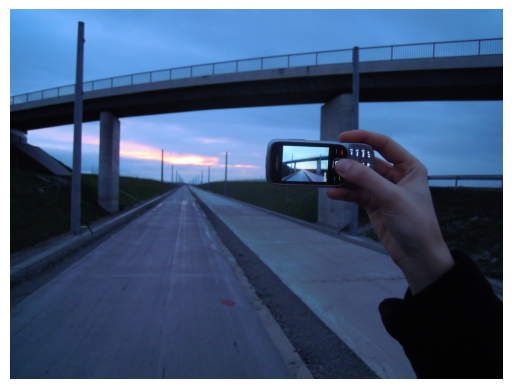

In [9]:
import cv2
from matplotlib import pyplot as plt

# Read the image using OpenCV
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your Kaggle dataset path
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (as OpenCV loads images in BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.show()

# Task: Resize the image

In [10]:
def resize_image(image_path, width, height):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Resize the image
    resized_image = cv2.resize(image, (width, height))

    # Save the resized image (optional)
    resized_image_path = "resized_" + image_path.split('/')[-1]
    cv2.imwrite(resized_image_path, resized_image)

    return f"Image resized and saved as {resized_image_path}"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
width, height = 640, 480  # Set your desired dimensions
print(resize_image(image_path, width, height))

Image resized and saved as resized_mobile_hand.png


# Task: Predict saturated and desaturated and check image size

In [11]:
import cv2
import numpy as np
from scipy.spatial import KDTree

def predict_image_color_type(image_path):
    color_names = {
        (255, 0, 0): "Red",
        (0, 255, 0): "Green",
        (0, 0, 255): "Blue",
        (255, 255, 0): "Yellow",
        (0, 255, 255): "Cyan",
        (255, 0, 255): "Magenta",
        (0, 0, 0): "Black",
        (255, 255, 255): "White",
        (128, 128, 128): "Gray",
        (55, 78, 112): "Blue"
        # Add more colors as needed
    }

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Calculate the average color
    average_color = np.mean(image, axis=(0, 1))

    # Convert color from BGR to RGB
    average_color_rgb = average_color[::-1]

    # Find the nearest color name
    tree = KDTree(list(color_names.keys()))
    _, idx = tree.query(average_color_rgb)
    nearest_color = list(color_names.values())[idx]

    # Check if the color is dark or light based on brightness
    brightness = np.mean(average_color)
    color_type_brightness = "Dark" if brightness < 128 else "Light"

    # Check if the color is saturated or desaturated based on saturation
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    saturation = np.mean(hsv_image[:, :, 1])
    color_type_saturation = "Desaturated" if saturation < 128 else "Saturated"

    # Get image size (width and height)
    height, width, _ = image.shape
    image_size = f"Image Size: {width}x{height}"

    return f"Predicted Color: {nearest_color}, Color Type (Brightness): {color_type_brightness}, Color Type (Saturation): {color_type_saturation}, {image_size}"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
print(predict_image_color_type(image_path))

Predicted Color: Blue, Color Type (Brightness): Dark, Color Type (Saturation): Desaturated, Image Size: 1200x900


# Change the color to Gray

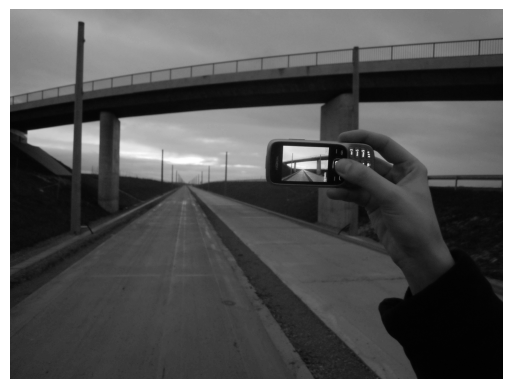

In [12]:
import cv2
from matplotlib import pyplot as plt

def convert_and_show_grayscale(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Display the grayscale image
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')  # Turn off axis numbers
    plt.show()

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
convert_and_show_grayscale(image_path)

In [13]:
import cv2
import numpy as np
from scipy.spatial import KDTree

def predict_image_clarity(image_path):
    color_names = {
        (255, 0, 0): "Red",
        (0, 255, 0): "Green",
        (0, 0, 255): "Blue",
        (255, 255, 0): "Yellow",
        (0, 255, 255): "Cyan",
        (255, 0, 255): "Magenta",
        (0, 0, 0): "Black",
        (255, 255, 255): "White",
        (128, 128, 128): "Gray",
        (55, 78, 112): "Blue"
        # Add more colors as needed
    }

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Calculate the Laplacian to measure image clarity
    laplacian = cv2.Laplacian(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cv2.CV_64F).var()

    # Convert average color from BGR to RGB
    average_color = np.mean(image, axis=(0, 1))
    average_color_rgb = average_color[::-1]

    # Find the nearest color name
    tree = KDTree(list(color_names.keys()))
    _, idx = tree.query(average_color_rgb)
    nearest_color = list(color_names.values())[idx]

    # Check if the color is dark or light based on brightness
    brightness = np.mean(average_color)
    color_type_brightness = "Dark" if brightness < 128 else "Light"

    # Check if the color is saturated or desaturated based on saturation
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    saturation = np.mean(hsv_image[:, :, 1])
    color_type_saturation = "Desaturated" if saturation < 128 else "Saturated"

    # Get image size (width and height)
    height, width, _ = image.shape
    image_size = f"Image Size: {width}x{height}"

    return f"Predicted Color: {nearest_color}, Color Type (Brightness): {color_type_brightness}, Color Type (Saturation): {color_type_saturation}, {image_size}, Image Clarity: {laplacian}"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with the path to your image
print(predict_image_clarity(image_path))

Predicted Color: Blue, Color Type (Brightness): Dark, Color Type (Saturation): Desaturated, Image Size: 1200x900, Image Clarity: 70.23375064835302


# Task: Flip the image

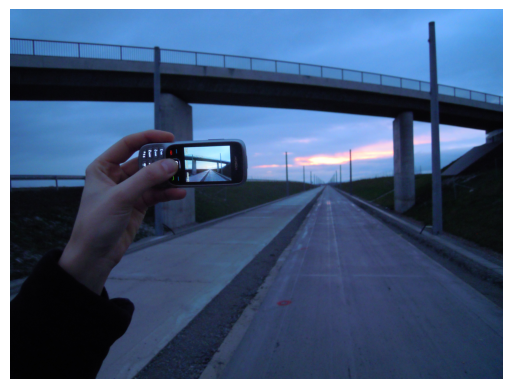

'Image flipped successfully'

In [14]:
def flip_image(image_path, flip_code):
    """
    Flip the image horizontally or vertically.
    :param image_path: path to the image file
    :param flip_code: 0 for vertical flip, 1 for horizontal flip, -1 for both
    :return: message indicating success and shows the flipped image
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Flip the image
    flipped_image = cv2.flip(image, flip_code)

    # Show the flipped image
    plt.imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return "Image flipped successfully"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
flip_code = 1  # 0 for vertical flip, 1 for horizontal flip, -1 for both
flip_image(image_path, flip_code)

> 0 for flipping vertically (upside down),
> 1 for flipping horizontally (left to right),
> -1 for flipping both horizontally and vertically.

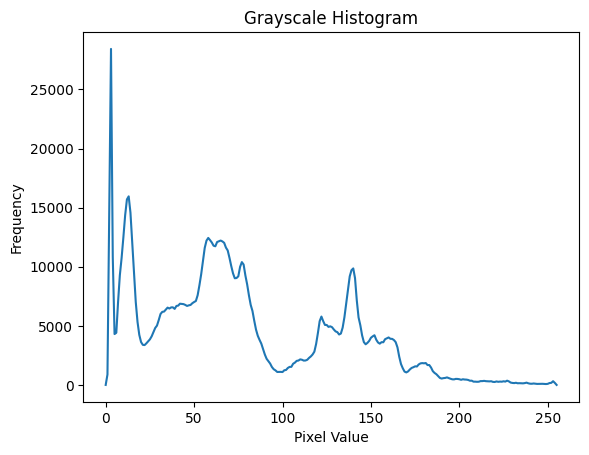

'Histogram displayed successfully'

In [15]:
def show_histogram(image_path):
    """
    Display the histogram of an image.
    :param image_path: path to the image file
    :return: displays the histogram of the image
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Convert to grayscale for simplicity
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate and plot histogram
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    plt.plot(histogram)
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

    return "Histogram displayed successfully"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
show_histogram(image_path)

The histogram will show the frequency of each pixel value, from 0 (black) to 255 (white), which can be very informative for understanding the overall exposure and tonal distribution of the image

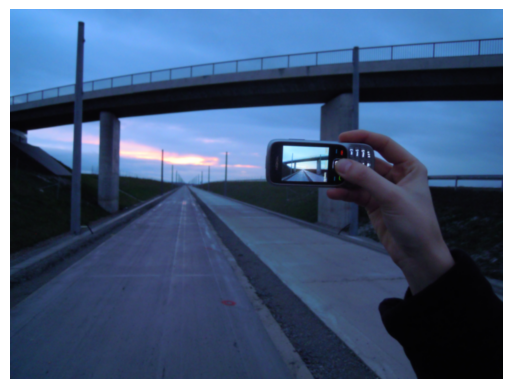

'Gaussian Blur applied successfully'

In [16]:
def apply_gaussian_blur(image_path, kernel_size=(5, 5)):
    """
    Apply Gaussian Blur to an image.
    :param image_path: path to the image file
    :param kernel_size: size of the Gaussian kernel
    :return: shows the blurred image
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)

    # Show the blurred image
    plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return "Gaussian Blur applied successfully"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
apply_gaussian_blur(image_path)

Blurring an image is often used to reduce noise and detail in an image. Gaussian Blur is a widely used effect in graphics software, typically used to reduce image noise and detail.

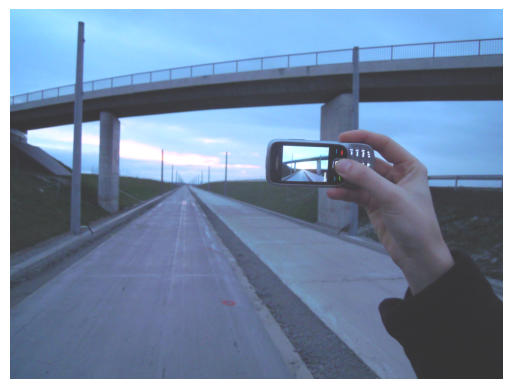

In [17]:
import cv2
from matplotlib import pyplot as plt

def adjust_brightness_and_show(image_path, alpha, beta):
    """
    Adjust the brightness of an image and display it in the notebook.
    :param image_path: path to the image file
    :param alpha: contrast control (1.0-3.0)
    :param beta: brightness control (0-100)
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Adjust brightness
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    # Convert to RGB and show the image
    adjusted_image_rgb = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB)
    plt.imshow(adjusted_image_rgb)
    plt.axis('off')  # Turn off axis numbers
    plt.show()

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your Kaggle dataset path
alpha = 1.0  # Contrast control (1.0-3.0)
beta = 50    # Brightness control (0-100)
adjust_brightness_and_show(image_path, alpha, beta)

# Give Brightness to image

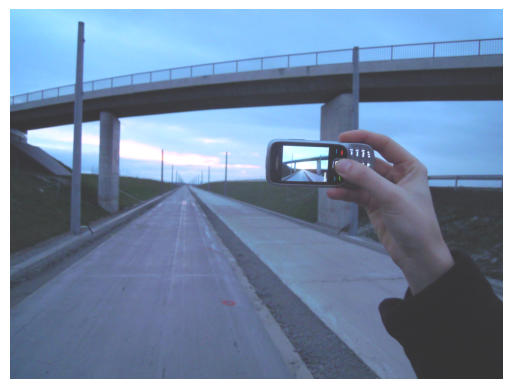

In [18]:
import cv2
from matplotlib import pyplot as plt

def adjust_brightness_and_show(image_path, alpha, beta):
    """
    Adjust the brightness of an image and display it in the notebook.
    :param image_path: path to the image file
    :param alpha: contrast control (1.0-3.0)
    :param beta: brightness control (0-100)
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Adjust brightness
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    # Convert to RGB and show the image
    adjusted_image_rgb = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB)
    plt.imshow(adjusted_image_rgb)
    plt.axis('off')  # Turn off axis numbers
    plt.show()

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your Kaggle dataset path
alpha = 1.0  # Contrast control (1.0-3.0)
beta = 50    # Brightness control (0-100)
adjust_brightness_and_show(image_path, alpha, beta)

Cropping the image:

Cropping is a common operation used to remove unwanted outer areas from an image, focus on a particular part of the image, or change the aspect ratio

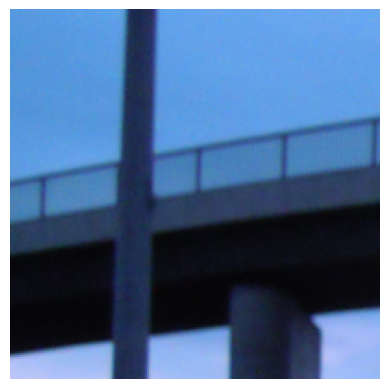

'Image cropped successfully'

In [19]:
def crop_image(image_path, start_x, start_y, width, height):
    """
    Crop an image.
    :param image_path: path to the image file
    :param start_x: x-coordinate of the top-left corner of the crop rectangle
    :param start_y: y-coordinate of the top-left corner of the crop rectangle
    :param width: width of the crop rectangle
    :param height: height of the crop rectangle
    :return: shows the cropped image
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Crop the image
    cropped_image = image[start_y:start_y+height, start_x:start_x+width]

    # Show the cropped image
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return "Image cropped successfully"


image_path = "/kaggle/input/mobileimage/mobile_hand.png"  
start_x, start_y = 100, 100  
width, height = 200, 200    
crop_image(image_path, start_x, start_y, width, height)

Rotation of image:

Rotation is a common image processing operation, useful for correcting the orientation of an image or for creating rotated versions of an image for tasks like data augmentation in machine learning.

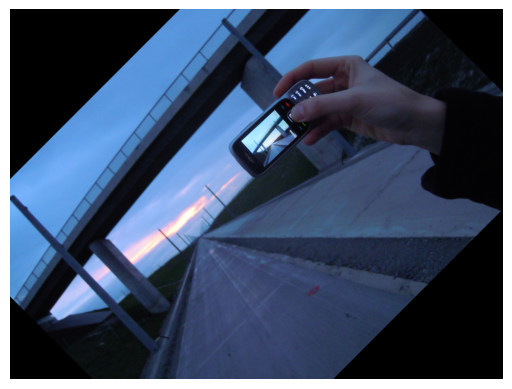

'Image rotated successfully'

In [20]:
def rotate_image(image_path, angle):
    """
    Rotate an image by a given angle.
    :param image_path: path to the image file
    :param angle: angle by which the image is to be rotated
    :return: shows the rotated image
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Get image dimensions
    (h, w) = image.shape[:2]

    # Calculate the center of the image
    center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, M, (w, h))

    # Show the rotated image
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return "Image rotated successfully"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
angle = 45  # Angle by which the image is to be rotated
rotate_image(image_path, angle)

Implementation of a feature to overlay text on an image.

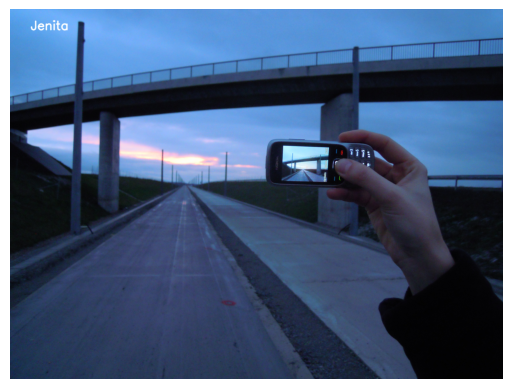

'Text added to image successfully'

In [21]:
def add_text_to_image(image_path, text, position, font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=1, font_color=(255,255,255), thickness=2, line_type=cv2.LINE_AA):
    """
    Add text to an image at a specified position.
    :param image_path: path to the image file
    :param text: text to be added
    :param position: bottom-left corner of the text in the image
    :param font: font type
    :param font_scale: font scale
    :param font_color: text color in BGR
    :param thickness: text thickness
    :param line_type: line type for the text
    :return: shows the image with text
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Put text on the image
    cv2.putText(image, text, position, font, font_scale, font_color, thickness, line_type)

    # Show the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return "Text added to image successfully"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
text = "Jenita"  # Text to be added
position = (50, 50)   # Bottom-left corner of the text
add_text_to_image(image_path, text, position)


Sepia toning:

Sepia toning is a photographic technique that gives images a warm brownish tone, reminiscent of historical photographs. It's a popular effect for giving photos a vintage or artistic look.

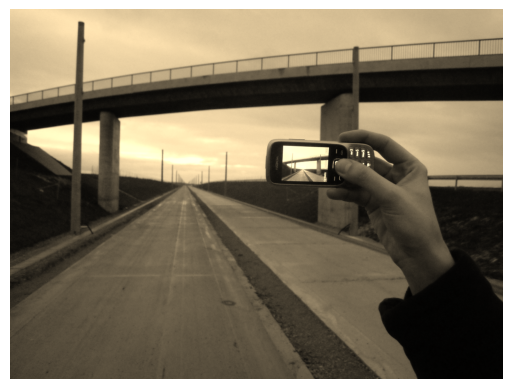

'Sepia tone applied successfully'

In [22]:
def apply_sepia_tone(image_path):
    """
    Apply a sepia tone to an image.
    :param image_path: path to the image file
    :return: shows the sepia-toned image
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Convert to float to prevent clipping values
    image = np.array(image, dtype=np.float64)

    # Apply sepia filter
    image = cv2.transform(image, np.matrix([[0.272, 0.534, 0.131],
                                            [0.349, 0.686, 0.168],
                                            [0.393, 0.769, 0.189]]))
    image = np.clip(image, 0, 255)

    # Convert back to uint8
    image = np.array(image, dtype=np.uint8)

    # Show the sepia-toned image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return "Sepia tone applied successfully"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"   # Replace with your image path
apply_sepia_tone(image_path)

Contour detection:

Contour detection is often used in object detection, shape analysis, and image segmentation.

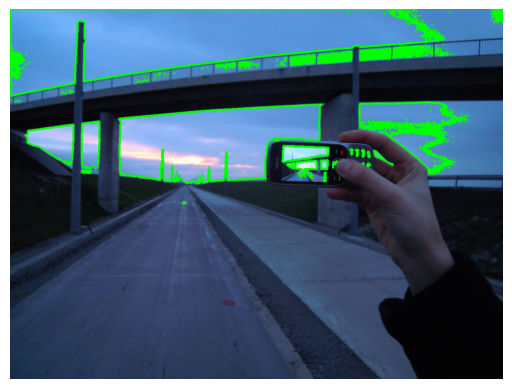

'Contours detected and drawn successfully'

In [23]:
def detect_and_draw_contours(image_path):
    """
    Detect and draw contours on an image.
    :param image_path: path to the image file
    :return: shows the image with contours
    """
    # Read the image and convert to grayscale
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to find contours
    ret, thresh = cv2.threshold(gray_image, 127, 255, 0)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    contour_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 3)

    # Show the image with contours
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return "Contours detected and drawn successfully"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
detect_and_draw_contours(image_path)

# Task :Convert the image from BGR to RGB (as OpenCV loads images in BGR)

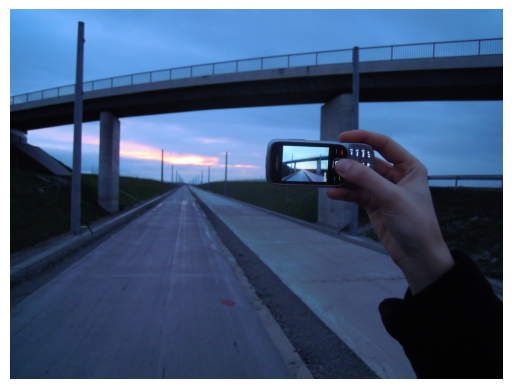

In [24]:
import cv2
from matplotlib import pyplot as plt

# Read the image using OpenCV
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your Kaggle dataset path
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (as OpenCV loads images in BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.show()

# Task : Calculate and plot histogram

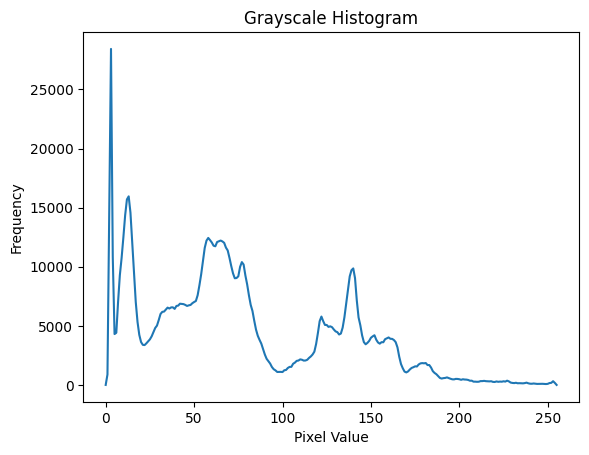

'Histogram displayed successfully'

In [25]:
def show_histogram(image_path):
    """
    Display the histogram of an image.
    :param image_path: path to the image file
    :return: displays the histogram of the image
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Convert to grayscale for simplicity
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate and plot histogram
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    plt.plot(histogram)
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

    return "Histogram displayed successfully"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
show_histogram(image_path)


# Task : Convert Image to Black and White: Create a function to convert an image to a binary black-and-white image using a threshold.

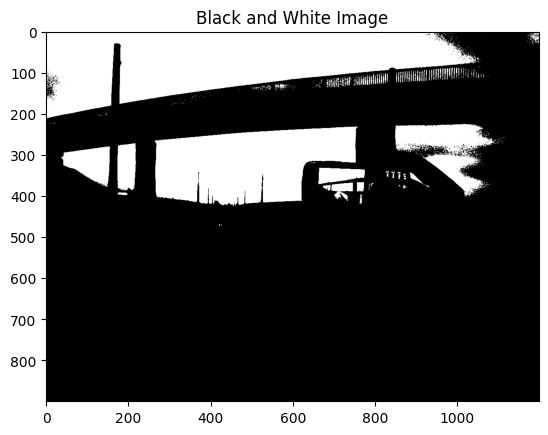

'Black and white image displayed successfully'

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def convert_to_black_and_white(image_path, threshold=127):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold
    _, bw_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)

    # Display the image
    plt.imshow(bw_image, cmap='gray')
    plt.title('Black and White Image')
    plt.show()

    return "Black and white image displayed successfully"


image_path = "/kaggle/input/mobileimage/mobile_hand.png"
convert_to_black_and_white(image_path)

# Task: Mirror Image Horizontally: Flip an image horizontally to create a mirror image effect.

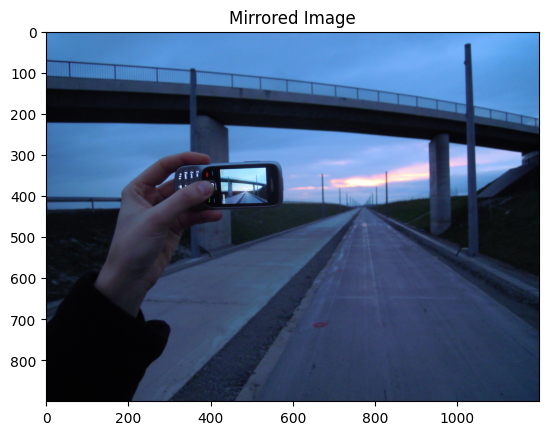

'Mirrored image displayed successfully'

In [27]:
import cv2
from matplotlib import pyplot as plt

def mirror_image_horizontally(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    mirrored_image = cv2.flip(image, 1)

    plt.imshow(cv2.cvtColor(mirrored_image, cv2.COLOR_BGR2RGB))
    plt.title('Mirrored Image')
    plt.show()

    return "Mirrored image displayed successfully"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"
mirror_image_horizontally(image_path)

# Task: Mirror Image Vertically: Similarly, flip an image vertically.

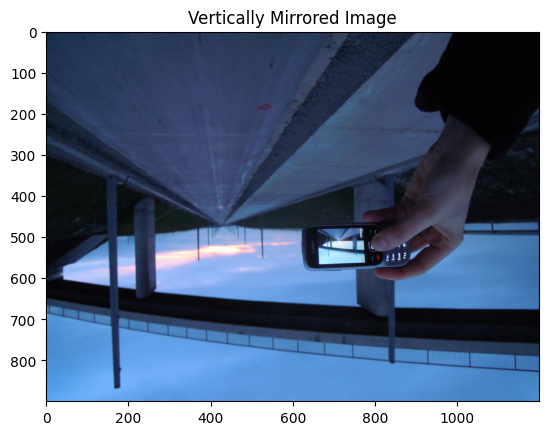

'Vertically mirrored image displayed successfully'

In [28]:
import cv2
from matplotlib import pyplot as plt

def mirror_image_vertically(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    mirrored_image = cv2.flip(image, 0)

    plt.imshow(cv2.cvtColor(mirrored_image, cv2.COLOR_BGR2RGB))
    plt.title('Vertically Mirrored Image')
    plt.show()
    
    return "Vertically mirrored image displayed successfully"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"
mirror_image_vertically(image_path)

# Task:  Resize Image to Half Size: A function to reduce the size of an image by half, maintaining its aspect ratio.

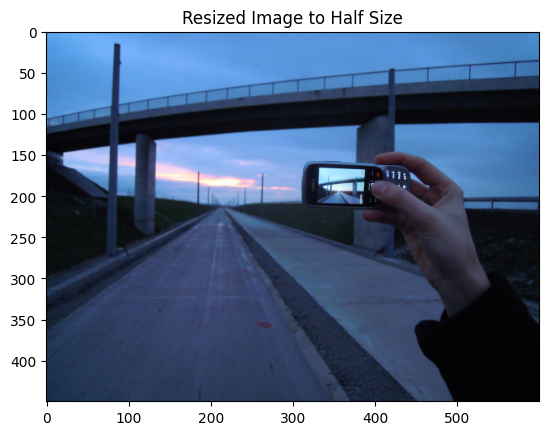

'Image resized to half size successfully'

In [29]:
import cv2
from matplotlib import pyplot as plt

def resize_image_to_half(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    height, width = image.shape[:2]
    resized_image = cv2.resize(image, (width // 2, height // 2))

    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.title('Resized Image to Half Size')
    plt.show()
    
    return "Image resized to half size successfully"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"
resize_image_to_half(image_path)

# Task : Convert Image to a Sketch: Apply a pencil sketch effect to an image by inverting its grayscale version and blending with the original.

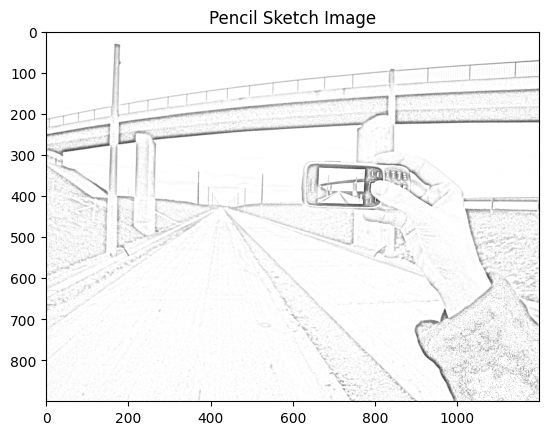

'Pencil sketch image displayed successfully'

In [30]:
import cv2
from matplotlib import pyplot as plt

def convert_to_pencil_sketch(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return "Image not found"

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Invert the grayscale image
    inverted_image = 255 - gray_image

    # Blur the inverted image
    blurred_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)

    # Invert the blurred image
    inverted_blurred = 255 - blurred_image

    # Create the pencil sketch image
    sketch_image = cv2.divide(gray_image, inverted_blurred, scale=256.0)

    plt.imshow(sketch_image, cmap='gray')
    plt.title('Pencil Sketch Image')
    plt.show()

    return "Pencil sketch image displayed successfully"

# Example usage
image_path = "/kaggle/input/mobileimage/mobile_hand.png"
convert_to_pencil_sketch(image_path)

# Task :  Overlay a Transparent Image: Place a transparent PNG (like a logo) over an image, at a specified position

In [31]:
'''
import cv2

def overlay_transparent_image(background_path, overlay_path, position=(0, 0)):
    # Read the background and overlay images
    background = cv2.imread(background_path, cv2.IMREAD_UNCHANGED)
    overlay = cv2.imread(overlay_path, cv2.IMREAD_UNCHANGED)

    # Check if the images are loaded
    if background is None or overlay is None:
        return "Image not found"

    # Get dimensions of overlay
    overlay_height, overlay_width = overlay.shape[:2]

    # Overlay position
    x, y = position

    # Region of Interest (ROI) in the background image where the overlay will be placed
    roi = background[y:y + overlay_height, x:x + overlay_width]

    # Separate the color and alpha channels of the overlay
    overlay_color = overlay[:, :, :3]
    overlay_alpha = overlay[:, :, 3]

    # Blend the overlay with the background within the ROI
    for c in range(0, 3):
        roi[:, :, c] = (roi[:, :, c] * (255 - overlay_alpha) + overlay_color[:, :, c] * overlay_alpha) / 255

    # Put the ROI back in the background image
    background[y:y + overlay_height, x:x + overlay_width] = roi

    # Save or display the result
    cv2.imwrite('output.jpg', background)
    return "Overlay completed successfully"

# Example usage
background_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your image path
overlay_path = "/kaggle/input/mobileimage/mobile_hand.png"  # Replace with your transparent PNG path
position = (50, 50)  # Replace with the desired position
overlay_transparent_image(background_path, overlay_path, position)
'''


'\nimport cv2\n\ndef overlay_transparent_image(background_path, overlay_path, position=(0, 0)):\n    # Read the background and overlay images\n    background = cv2.imread(background_path, cv2.IMREAD_UNCHANGED)\n    overlay = cv2.imread(overlay_path, cv2.IMREAD_UNCHANGED)\n\n    # Check if the images are loaded\n    if background is None or overlay is None:\n        return "Image not found"\n\n    # Get dimensions of overlay\n    overlay_height, overlay_width = overlay.shape[:2]\n\n    # Overlay position\n    x, y = position\n\n    # Region of Interest (ROI) in the background image where the overlay will be placed\n    roi = background[y:y + overlay_height, x:x + overlay_width]\n\n    # Separate the color and alpha channels of the overlay\n    overlay_color = overlay[:, :, :3]\n    overlay_alpha = overlay[:, :, 3]\n\n    # Blend the overlay with the background within the ROI\n    for c in range(0, 3):\n        roi[:, :, c] = (roi[:, :, c] * (255 - overlay_alpha) + overlay_color[:, :, c]

# Task: Create a Photo Collage: Combine multiple images into a single collage image.

In [32]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [33]:
from PIL import Image
import os

# Path to the input image
input_image_path = "/kaggle/input/mobileimage/mobile_hand.png"

# Number of times to repeat the image in the collage
num_repeats = 4

# Create a list to store image objects
images = []

# Open the input image
with Image.open(input_image_path) as img:
    # Resize the image to a fixed size (adjust as needed)
    img = img.resize((200, 200))

    # Repeat the image and append to the list
    for _ in range(num_repeats):
        images.append(img)

# Calculate the dimensions of the collage based on the number of images
collage_width = img.width * num_repeats
collage_height = img.height

# Create a blank collage image
collage = Image.new('RGB', (collage_width, collage_height))

# Paste the images onto the collage
for i, img in enumerate(images):
    collage.paste(img, (i * img.width, 0))

# Save the collage image
collage_path = "/kaggle/working/photo_collage.png"
collage.save(collage_path)

# Display the collage path
display(f"Collage image saved to: {collage_path}")


'Collage image saved to: /kaggle/working/photo_collage.png'

# Task : Extract a Color Channel: Separate and display a specific color channel (Red, Green, or Blue) from an image.

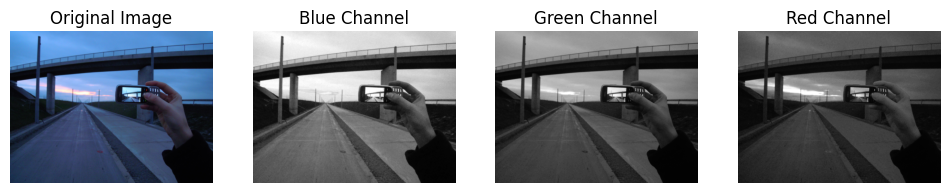

In [34]:
import cv2
import matplotlib.pyplot as plt

# Path to the input image
input_image_path = "/kaggle/input/mobileimage/mobile_hand.png"

# Read the image
image = cv2.imread(input_image_path)

# Split the image into its RGB channels
blue_channel, green_channel, red_channel = cv2.split(image)

# Display each color channel separately
plt.figure(figsize=(12, 4))

# Display the original image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display the Blue channel
plt.subplot(1, 4, 2)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

# Display the Green channel
plt.subplot(1, 4, 3)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

# Display the Red channel
plt.subplot(1, 4, 4)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

plt.show()

# Task :  Create a Photo Border: Add a simple colored border around an image.

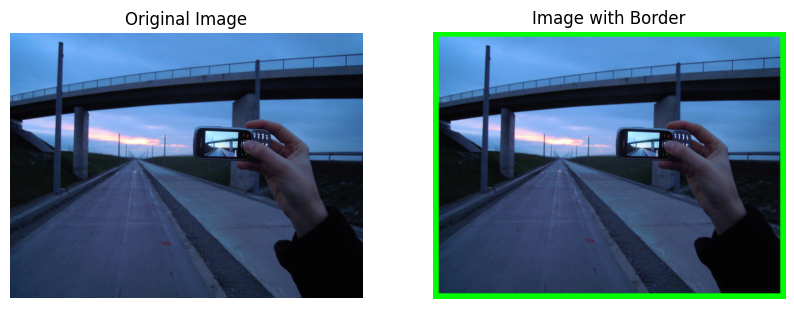

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input image
input_image_path = "/kaggle/input/mobileimage/mobile_hand.png"

# Read the image
image = cv2.imread(input_image_path)

# Specify the border color (you can adjust this)
border_color = [0, 255, 0]  # RGB format: [B, G, R]

# Specify the border size (you can adjust this)
border_size = 20

# Add a border around the image
image_with_border = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT, value=border_color)

# Display the original and bordered images
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display the image with a border
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_border, cv2.COLOR_BGR2RGB))
plt.title('Image with Border')
plt.axis('off')

plt.show()

# Task: Generate a Thumbnail: Resize an image to create a thumbnail, which is a smaller version suitable for previews or icons.

In [36]:
pip install pillow matplotlib

Note: you may need to restart the kernel to use updated packages.


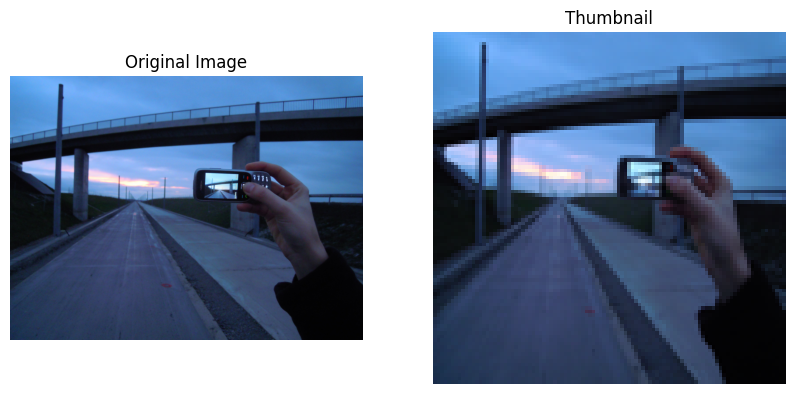

In [37]:
from PIL import Image
import matplotlib.pyplot as plt


# Path to the input image
input_image_path = "/kaggle/input/mobileimage/mobile_hand.png"

# Read the image
image = Image.open(input_image_path)

# Specify the size for the thumbnail (you can adjust this)
thumbnail_size = (100, 100)

# Generate the thumbnail
thumbnail = image.resize(thumbnail_size)

# Display the original and thumbnail images
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Display the thumbnail
plt.subplot(1, 2, 2)
plt.imshow(thumbnail)
plt.title('Thumbnail')
plt.axis('off')

plt.show()